In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

## Task-1

In [3]:
df_16 = pd.read_csv(r"C:\Users\fyasi\Downloads\cQuant-programming-exercise\Data\historicalPriceData\ERCOT_DA_Prices_2016.csv") #change path
df_16

,Date,SettlementPoint,Price
0,2016-01-01 00:00:00,HB_BUSAVG,18.42
1,2016-01-01 00:00:00,HB_HOUSTON,18.42
2,2016-01-01 00:00:00,HB_HUBAVG,18.42
3,2016-01-01 00:00:00,HB_NORTH,18.43
4,2016-01-01 00:00:00,HB_SOUTH,18.38
...,...,...,...
122957,2016-12-31 23:00:00,LZ_LCRA,24.97
122958,2016-12-31 23:00:00,LZ_NORTH,24.97
122959,2016-12-31 23:00:00,LZ_RAYBN,24.97
122960,2016-12-31 23:00:00,LZ_SOUTH,24.97


In [4]:
df_17 = pd.read_csv(r"C:\Users\fyasi\Downloads\cQuant-programming-exercise\Data\historicalPriceData\ERCOT_DA_Prices_2017.csv") #change path
df_17

,Date,SettlementPoint,Price
0,2017-01-01 00:00:00,HB_BUSAVG,23.23
1,2017-01-01 00:00:00,HB_HOUSTON,23.23
2,2017-01-01 00:00:00,HB_HUBAVG,23.23
3,2017-01-01 00:00:00,HB_NORTH,23.23
4,2017-01-01 00:00:00,HB_SOUTH,23.23
...,...,...,...
122621,2017-12-31 23:00:00,LZ_LCRA,21.71
122622,2017-12-31 23:00:00,LZ_NORTH,21.76
122623,2017-12-31 23:00:00,LZ_RAYBN,21.78
122624,2017-12-31 23:00:00,LZ_SOUTH,22.39


In [5]:
df_18 = pd.read_csv(r"C:\Users\fyasi\Downloads\cQuant-programming-exercise\Data\historicalPriceData\ERCOT_DA_Prices_2018.csv") #change path
df_18

,Date,SettlementPoint,Price
0,2018-01-01 00:00:00,HB_BUSAVG,27.18
1,2018-01-01 00:00:00,HB_HOUSTON,26.85
2,2018-01-01 00:00:00,HB_HUBAVG,27.18
3,2018-01-01 00:00:00,HB_NORTH,27.23
4,2018-01-01 00:00:00,HB_SOUTH,27.14
...,...,...,...
122621,2018-12-31 23:00:00,LZ_LCRA,20.54
122622,2018-12-31 23:00:00,LZ_NORTH,20.49
122623,2018-12-31 23:00:00,LZ_RAYBN,20.49
122624,2018-12-31 23:00:00,LZ_SOUTH,21.68


In [6]:
df_19 = pd.read_csv(r"C:\Users\fyasi\Downloads\cQuant-programming-exercise\Data\historicalPriceData\ERCOT_DA_Prices_2019.csv") #change path
df_19

,Date,SettlementPoint,Price
0,2019-01-01 00:00:00,HB_BUSAVG,20.49
1,2019-01-01 00:00:00,HB_HOUSTON,20.12
2,2019-01-01 00:00:00,HB_HUBAVG,20.54
3,2019-01-01 00:00:00,HB_NORTH,20.49
4,2019-01-01 00:00:00,HB_SOUTH,20.34
...,...,...,...
129101,2019-12-31 23:00:00,LZ_LCRA,14.53
129102,2019-12-31 23:00:00,LZ_NORTH,14.48
129103,2019-12-31 23:00:00,LZ_RAYBN,14.48
129104,2019-12-31 23:00:00,LZ_SOUTH,14.70


In [7]:
combined_df = pd.concat([df_16, df_17, df_18, df_19], ignore_index=True)
combined_df

,Date,SettlementPoint,Price
0,2016-01-01 00:00:00,HB_BUSAVG,18.42
1,2016-01-01 00:00:00,HB_HOUSTON,18.42
2,2016-01-01 00:00:00,HB_HUBAVG,18.42
3,2016-01-01 00:00:00,HB_NORTH,18.43
4,2016-01-01 00:00:00,HB_SOUTH,18.38
...,...,...,...
497315,2019-12-31 23:00:00,LZ_LCRA,14.53
497316,2019-12-31 23:00:00,LZ_NORTH,14.48
497317,2019-12-31 23:00:00,LZ_RAYBN,14.48
497318,2019-12-31 23:00:00,LZ_SOUTH,14.70


In [8]:
#specify path
combined_df.to_csv(r"C:\Users\fyasi\Downloads\cQuant-programming-exercise\Output\Combined_ERCOT_DA_Prices_2016_2019.csv", index=False)

## Task-2

In [10]:
df_16["SettlementPoint"].nunique()

14

In [11]:
df_16["Date"] = pd.to_datetime(df_16["Date"])
df_16["Year"]  = df_16["Date"].dt.year
df_16["Month"] = df_16["Date"].dt.month
df_16

,Date,SettlementPoint,Price,Year,Month
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,2016,1
1,2016-01-01 00:00:00,HB_HOUSTON,18.42,2016,1
2,2016-01-01 00:00:00,HB_HUBAVG,18.42,2016,1
3,2016-01-01 00:00:00,HB_NORTH,18.43,2016,1
4,2016-01-01 00:00:00,HB_SOUTH,18.38,2016,1
...,...,...,...,...,...
122957,2016-12-31 23:00:00,LZ_LCRA,24.97,2016,12
122958,2016-12-31 23:00:00,LZ_NORTH,24.97,2016,12
122959,2016-12-31 23:00:00,LZ_RAYBN,24.97,2016,12
122960,2016-12-31 23:00:00,LZ_SOUTH,24.97,2016,12


In [12]:
avg_price_df_16 = (df_16.groupby(["SettlementPoint", "Year", "Month"])["Price"].mean().reset_index(name="AveragePrice"))
avg_price_df_16                  

,SettlementPoint,Year,Month,AveragePrice
0,HB_BUSAVG,2016,1,19.209301
1,HB_BUSAVG,2016,2,15.288247
2,HB_BUSAVG,2016,3,16.755626
3,HB_BUSAVG,2016,4,18.289347
4,HB_BUSAVG,2016,5,18.159583
...,...,...,...,...
163,LZ_WEST,2016,8,30.010565
164,LZ_WEST,2016,9,26.767667
165,LZ_WEST,2016,10,25.182258
166,LZ_WEST,2016,11,19.343139


In [13]:
df_17["SettlementPoint"].nunique()

14

In [14]:
df_17["Date"] = pd.to_datetime(df_17["Date"])
df_17["Year"]  = df_17["Date"].dt.year
df_17["Month"] = df_17["Date"].dt.month
df_17

,Date,SettlementPoint,Price,Year,Month
0,2017-01-01 00:00:00,HB_BUSAVG,23.23,2017,1
1,2017-01-01 00:00:00,HB_HOUSTON,23.23,2017,1
2,2017-01-01 00:00:00,HB_HUBAVG,23.23,2017,1
3,2017-01-01 00:00:00,HB_NORTH,23.23,2017,1
4,2017-01-01 00:00:00,HB_SOUTH,23.23,2017,1
...,...,...,...,...,...
122621,2017-12-31 23:00:00,LZ_LCRA,21.71,2017,12
122622,2017-12-31 23:00:00,LZ_NORTH,21.76,2017,12
122623,2017-12-31 23:00:00,LZ_RAYBN,21.78,2017,12
122624,2017-12-31 23:00:00,LZ_SOUTH,22.39,2017,12


In [15]:
avg_price_df_17 = (df_17.groupby(["SettlementPoint", "Year", "Month"])["Price"].mean().reset_index(name="AveragePrice"))
avg_price_df_17                  

,SettlementPoint,Year,Month,AveragePrice
0,HB_BUSAVG,2017,1,23.252782
1,HB_BUSAVG,2017,2,20.117827
2,HB_BUSAVG,2017,3,22.569892
3,HB_BUSAVG,2017,4,23.705083
4,HB_BUSAVG,2017,5,25.087352
...,...,...,...,...
163,LZ_WEST,2017,8,27.213911
164,LZ_WEST,2017,9,27.011778
165,LZ_WEST,2017,10,22.173320
166,LZ_WEST,2017,11,22.152917


In [16]:
df_18["SettlementPoint"].nunique()

14

In [17]:
df_18["Date"] = pd.to_datetime(df_18["Date"])
df_18["Year"]  = df_18["Date"].dt.year
df_18["Month"] = df_18["Date"].dt.month
df_18

,Date,SettlementPoint,Price,Year,Month
0,2018-01-01 00:00:00,HB_BUSAVG,27.18,2018,1
1,2018-01-01 00:00:00,HB_HOUSTON,26.85,2018,1
2,2018-01-01 00:00:00,HB_HUBAVG,27.18,2018,1
3,2018-01-01 00:00:00,HB_NORTH,27.23,2018,1
4,2018-01-01 00:00:00,HB_SOUTH,27.14,2018,1
...,...,...,...,...,...
122621,2018-12-31 23:00:00,LZ_LCRA,20.54,2018,12
122622,2018-12-31 23:00:00,LZ_NORTH,20.49,2018,12
122623,2018-12-31 23:00:00,LZ_RAYBN,20.49,2018,12
122624,2018-12-31 23:00:00,LZ_SOUTH,21.68,2018,12


In [18]:
avg_price_df_18 = (df_18.groupby(["SettlementPoint", "Year", "Month"])["Price"].mean().reset_index(name="AveragePrice"))
avg_price_df_18                  

,SettlementPoint,Year,Month,AveragePrice
0,HB_BUSAVG,2018,1,37.869677
1,HB_BUSAVG,2018,2,21.854315
2,HB_BUSAVG,2018,3,22.561978
3,HB_BUSAVG,2018,4,23.142958
4,HB_BUSAVG,2018,5,34.005242
...,...,...,...,...
163,LZ_WEST,2018,8,33.289852
164,LZ_WEST,2018,9,27.101097
165,LZ_WEST,2018,10,30.004556
166,LZ_WEST,2018,11,31.224028


In [19]:
df_19["SettlementPoint"].nunique()

15

In [20]:
df_19["Date"] = pd.to_datetime(df_19["Date"])
df_19["Year"]  = df_19["Date"].dt.year
df_19["Month"] = df_19["Date"].dt.month
df_19

,Date,SettlementPoint,Price,Year,Month
0,2019-01-01 00:00:00,HB_BUSAVG,20.49,2019,1
1,2019-01-01 00:00:00,HB_HOUSTON,20.12,2019,1
2,2019-01-01 00:00:00,HB_HUBAVG,20.54,2019,1
3,2019-01-01 00:00:00,HB_NORTH,20.49,2019,1
4,2019-01-01 00:00:00,HB_SOUTH,20.34,2019,1
...,...,...,...,...,...
129101,2019-12-31 23:00:00,LZ_LCRA,14.53,2019,12
129102,2019-12-31 23:00:00,LZ_NORTH,14.48,2019,12
129103,2019-12-31 23:00:00,LZ_RAYBN,14.48,2019,12
129104,2019-12-31 23:00:00,LZ_SOUTH,14.70,2019,12


In [21]:
avg_price_df_19 = (df_19.groupby(["SettlementPoint", "Year", "Month"])["Price"].mean().reset_index(name="AveragePrice"))
avg_price_df_19                  

,SettlementPoint,Year,Month,AveragePrice
0,HB_BUSAVG,2019,1,24.592567
1,HB_BUSAVG,2019,2,21.186369
2,HB_BUSAVG,2019,3,27.565720
3,HB_BUSAVG,2019,4,22.613181
4,HB_BUSAVG,2019,5,23.959933
...,...,...,...,...
172,LZ_WEST,2019,8,128.876465
173,LZ_WEST,2019,9,83.471139
174,LZ_WEST,2019,10,49.383360
175,LZ_WEST,2019,11,49.340847


## Task-3

In [23]:
avg_price_df = pd.concat([avg_price_df_16, avg_price_df_17, avg_price_df_18, avg_price_df_19], ignore_index=True)
avg_price_df

,SettlementPoint,Year,Month,AveragePrice
0,HB_BUSAVG,2016,1,19.209301
1,HB_BUSAVG,2016,2,15.288247
2,HB_BUSAVG,2016,3,16.755626
3,HB_BUSAVG,2016,4,18.289347
4,HB_BUSAVG,2016,5,18.159583
...,...,...,...,...
676,LZ_WEST,2019,8,128.876465
677,LZ_WEST,2019,9,83.471139
678,LZ_WEST,2019,10,49.383360
679,LZ_WEST,2019,11,49.340847


In [24]:
#specify path
avg_price_df.to_csv(r"C:\Users\fyasi\Downloads\cQuant-programming-exercise\Output\AveragePriceByMonth.csv", index=False)

## Task-4

In [26]:
combined_df

,Date,SettlementPoint,Price
0,2016-01-01 00:00:00,HB_BUSAVG,18.42
1,2016-01-01 00:00:00,HB_HOUSTON,18.42
2,2016-01-01 00:00:00,HB_HUBAVG,18.42
3,2016-01-01 00:00:00,HB_NORTH,18.43
4,2016-01-01 00:00:00,HB_SOUTH,18.38
...,...,...,...
497315,2019-12-31 23:00:00,LZ_LCRA,14.53
497316,2019-12-31 23:00:00,LZ_NORTH,14.48
497317,2019-12-31 23:00:00,LZ_RAYBN,14.48
497318,2019-12-31 23:00:00,LZ_SOUTH,14.70


In [27]:
combined_df["Date"] = pd.to_datetime(combined_df["Date"])
combined_df["Year"] = combined_df["Date"].dt.year
combined_df

,Date,SettlementPoint,Price,Year
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,2016
1,2016-01-01 00:00:00,HB_HOUSTON,18.42,2016
2,2016-01-01 00:00:00,HB_HUBAVG,18.42,2016
3,2016-01-01 00:00:00,HB_NORTH,18.43,2016
4,2016-01-01 00:00:00,HB_SOUTH,18.38,2016
...,...,...,...,...
497315,2019-12-31 23:00:00,LZ_LCRA,14.53,2019
497316,2019-12-31 23:00:00,LZ_NORTH,14.48,2019
497317,2019-12-31 23:00:00,LZ_RAYBN,14.48,2019
497318,2019-12-31 23:00:00,LZ_SOUTH,14.70,2019


In [28]:
hubs_df = combined_df[combined_df["SettlementPoint"].str.startswith("HB_")].copy()
hubs_df

,Date,SettlementPoint,Price,Year
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,2016
1,2016-01-01 00:00:00,HB_HOUSTON,18.42,2016
2,2016-01-01 00:00:00,HB_HUBAVG,18.42,2016
3,2016-01-01 00:00:00,HB_NORTH,18.43,2016
4,2016-01-01 00:00:00,HB_SOUTH,18.38,2016
...,...,...,...,...
497307,2019-12-31 23:00:00,HB_HUBAVG,14.45,2019
497308,2019-12-31 23:00:00,HB_NORTH,14.46,2019
497309,2019-12-31 23:00:00,HB_PAN,14.12,2019
497310,2019-12-31 23:00:00,HB_SOUTH,14.50,2019


In [29]:
hubs_df = hubs_df[hubs_df["Price"] > 0].copy()
hubs_df

,Date,SettlementPoint,Price,Year
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,2016
1,2016-01-01 00:00:00,HB_HOUSTON,18.42,2016
2,2016-01-01 00:00:00,HB_HUBAVG,18.42,2016
3,2016-01-01 00:00:00,HB_NORTH,18.43,2016
4,2016-01-01 00:00:00,HB_SOUTH,18.38,2016
...,...,...,...,...
497307,2019-12-31 23:00:00,HB_HUBAVG,14.45,2019
497308,2019-12-31 23:00:00,HB_NORTH,14.46,2019
497309,2019-12-31 23:00:00,HB_PAN,14.12,2019
497310,2019-12-31 23:00:00,HB_SOUTH,14.50,2019


In [30]:
hubs_df = hubs_df.sort_values(["SettlementPoint", "Year", "Date"])
hubs_df

,Date,SettlementPoint,Price,Year
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,2016
14,2016-01-01 01:00:00,HB_BUSAVG,16.15,2016
28,2016-01-01 02:00:00,HB_BUSAVG,15.61,2016
42,2016-01-01 03:00:00,HB_BUSAVG,15.62,2016
56,2016-01-01 04:00:00,HB_BUSAVG,15.94,2016
...,...,...,...,...
497251,2019-12-31 19:00:00,HB_WEST,18.56,2019
497266,2019-12-31 20:00:00,HB_WEST,17.09,2019
497281,2019-12-31 21:00:00,HB_WEST,15.66,2019
497296,2019-12-31 22:00:00,HB_WEST,15.15,2019


In [31]:
hubs_df["log_price"] = np.log(hubs_df["Price"])
hubs_df

,Date,SettlementPoint,Price,Year,log_price
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,2016,2.913437
14,2016-01-01 01:00:00,HB_BUSAVG,16.15,2016,2.781920
28,2016-01-01 02:00:00,HB_BUSAVG,15.61,2016,2.747912
42,2016-01-01 03:00:00,HB_BUSAVG,15.62,2016,2.748552
56,2016-01-01 04:00:00,HB_BUSAVG,15.94,2016,2.768832
...,...,...,...,...,...
497251,2019-12-31 19:00:00,HB_WEST,18.56,2019,2.921009
497266,2019-12-31 20:00:00,HB_WEST,17.09,2019,2.838493
497281,2019-12-31 21:00:00,HB_WEST,15.66,2019,2.751110
497296,2019-12-31 22:00:00,HB_WEST,15.15,2019,2.718001


In [32]:
hubs_df["log_return"] = hubs_df.groupby(["SettlementPoint", "Year"])["log_price"].diff()
hubs_df

,Date,SettlementPoint,Price,Year,log_price,log_return
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,2016,2.913437,NaN
14,2016-01-01 01:00:00,HB_BUSAVG,16.15,2016,2.781920,-0.131517
28,2016-01-01 02:00:00,HB_BUSAVG,15.61,2016,2.747912,-0.034008
42,2016-01-01 03:00:00,HB_BUSAVG,15.62,2016,2.748552,0.000640
56,2016-01-01 04:00:00,HB_BUSAVG,15.94,2016,2.768832,0.020280
...,...,...,...,...,...,...
497251,2019-12-31 19:00:00,HB_WEST,18.56,2019,2.921009,-0.116825
497266,2019-12-31 20:00:00,HB_WEST,17.09,2019,2.838493,-0.082515
497281,2019-12-31 21:00:00,HB_WEST,15.66,2019,2.751110,-0.087384
497296,2019-12-31 22:00:00,HB_WEST,15.15,2019,2.718001,-0.033109


In [33]:
vol_df = (hubs_df.groupby(["SettlementPoint", "Year"])["log_return"].std().reset_index(name="HourlyVolatility"))
vol_df

,SettlementPoint,Year,HourlyVolatility
0,HB_BUSAVG,2016,0.185773
1,HB_BUSAVG,2017,0.154092
2,HB_BUSAVG,2018,0.200254
3,HB_BUSAVG,2019,0.249378
4,HB_HOUSTON,2016,0.191099
5,HB_HOUSTON,2017,0.170477
6,HB_HOUSTON,2018,0.200244
7,HB_HOUSTON,2019,0.247946
8,HB_HUBAVG,2016,0.187957
9,HB_HUBAVG,2017,0.158687


## Task-5

In [35]:
#specify path
vol_df.to_csv(r"C:\Users\fyasi\Downloads\cQuant-programming-exercise\Output\HourlyVolatilityByYear.csv", index=False)

## Task-6

In [37]:
vol_df

,SettlementPoint,Year,HourlyVolatility
0,HB_BUSAVG,2016,0.185773
1,HB_BUSAVG,2017,0.154092
2,HB_BUSAVG,2018,0.200254
3,HB_BUSAVG,2019,0.249378
4,HB_HOUSTON,2016,0.191099
5,HB_HOUSTON,2017,0.170477
6,HB_HOUSTON,2018,0.200244
7,HB_HOUSTON,2019,0.247946
8,HB_HUBAVG,2016,0.187957
9,HB_HUBAVG,2017,0.158687


In [38]:
idx = vol_df.groupby("Year")["HourlyVolatility"].idxmax()
max_vol_df = vol_df.loc[idx].reset_index(drop=True)
max_vol_df

,SettlementPoint,Year,HourlyVolatility
0,HB_SOUTH,2016,0.209026
1,HB_WEST,2017,0.247628
2,HB_WEST,2018,0.302512
3,HB_PAN,2019,0.631635


In [39]:
#Specify path
max_vol_df.to_csv(r"C:\Users\fyasi\Downloads\cQuant-programming-exercise\Output\MaxVolatilityByYear.csv", index=False)

## Task-7

In [41]:
combined_df

,Date,SettlementPoint,Price,Year
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,2016
1,2016-01-01 00:00:00,HB_HOUSTON,18.42,2016
2,2016-01-01 00:00:00,HB_HUBAVG,18.42,2016
3,2016-01-01 00:00:00,HB_NORTH,18.43,2016
4,2016-01-01 00:00:00,HB_SOUTH,18.38,2016
...,...,...,...,...
497315,2019-12-31 23:00:00,LZ_LCRA,14.53,2019
497316,2019-12-31 23:00:00,LZ_NORTH,14.48,2019
497317,2019-12-31 23:00:00,LZ_RAYBN,14.48,2019
497318,2019-12-31 23:00:00,LZ_SOUTH,14.70,2019


In [42]:
combined_df["Date"] = pd.to_datetime(combined_df["Date"])

In [43]:
settlementpoint = combined_df["SettlementPoint"].unique()
settlementpoint

array(['HB_BUSAVG', 'HB_HOUSTON', 'HB_HUBAVG', 'HB_NORTH', 'HB_SOUTH',
       'HB_WEST', 'LZ_AEN', 'LZ_CPS', 'LZ_HOUSTON', 'LZ_LCRA', 'LZ_NORTH',
       'LZ_RAYBN', 'LZ_SOUTH', 'LZ_WEST', 'HB_PAN'], dtype=object)

In [44]:
spot_dir = r"C:\Users\fyasi\Downloads\cQuant-programming-exercise\Output\formattedSpotHistory" #Specify path
for i in settlementpoint:
    df_i = combined_df[combined_df["SettlementPoint"] == i].copy()
    df_i["DateStr"] = df_i["Date"].dt.strftime("%Y-%m-%d")
    df_i["Hour"] = df_i["Date"].dt.hour + 1 
    pivot = df_i.pivot_table(index="DateStr", columns="Hour", values="Price", aggfunc="first")
    pivot = pivot.reindex(columns=range(1, 24 + 1))
    pivot.columns = [f"X{h}" for h in pivot.columns]
    spot_df = pivot.reset_index().rename(columns={"DateStr": "Date"})
    spot_df.insert(0, "Variable", i)
    spot_df = spot_df.sort_values("Date")
    spot_path = os.path.join(spot_dir, f"spot_{i}.csv")
    spot_df.to_csv(spot_path, index=False)

## Bonus–Mean Plots

In [46]:
avg_price_df

,SettlementPoint,Year,Month,AveragePrice
0,HB_BUSAVG,2016,1,19.209301
1,HB_BUSAVG,2016,2,15.288247
2,HB_BUSAVG,2016,3,16.755626
3,HB_BUSAVG,2016,4,18.289347
4,HB_BUSAVG,2016,5,18.159583
...,...,...,...,...
676,LZ_WEST,2019,8,128.876465
677,LZ_WEST,2019,9,83.471139
678,LZ_WEST,2019,10,49.383360
679,LZ_WEST,2019,11,49.340847


In [47]:
avg_price_df["Date"] = pd.to_datetime(avg_price_df["Year"].astype(str) + "-" + avg_price_df["Month"].astype(str) + "-01")
avg_price_df

,SettlementPoint,Year,Month,AveragePrice,Date
0,HB_BUSAVG,2016,1,19.209301,2016-01-01
1,HB_BUSAVG,2016,2,15.288247,2016-02-01
2,HB_BUSAVG,2016,3,16.755626,2016-03-01
3,HB_BUSAVG,2016,4,18.289347,2016-04-01
4,HB_BUSAVG,2016,5,18.159583,2016-05-01
...,...,...,...,...,...
676,LZ_WEST,2019,8,128.876465,2019-08-01
677,LZ_WEST,2019,9,83.471139,2019-09-01
678,LZ_WEST,2019,10,49.383360,2019-10-01
679,LZ_WEST,2019,11,49.340847,2019-11-01


In [48]:
hubs_df = avg_price_df[avg_price_df["SettlementPoint"].str.startswith("HB_")].copy()
hubs_df

,SettlementPoint,Year,Month,AveragePrice,Date
0,HB_BUSAVG,2016,1,19.209301,2016-01-01
1,HB_BUSAVG,2016,2,15.288247,2016-02-01
2,HB_BUSAVG,2016,3,16.755626,2016-03-01
3,HB_BUSAVG,2016,4,18.289347,2016-04-01
4,HB_BUSAVG,2016,5,18.159583,2016-05-01
...,...,...,...,...,...
580,HB_WEST,2019,8,126.315282,2019-08-01
581,HB_WEST,2019,9,78.429250,2019-09-01
582,HB_WEST,2019,10,24.668132,2019-10-01
583,HB_WEST,2019,11,21.660264,2019-11-01


In [49]:
load_df = avg_price_df[avg_price_df["SettlementPoint"].str.startswith("LZ_")].copy()
load_df

,SettlementPoint,Year,Month,AveragePrice,Date
72,LZ_AEN,2016,1,19.324664,2016-01-01
73,LZ_AEN,2016,2,15.448290,2016-02-01
74,LZ_AEN,2016,3,16.855074,2016-03-01
75,LZ_AEN,2016,4,18.256069,2016-04-01
76,LZ_AEN,2016,5,18.124906,2016-05-01
...,...,...,...,...,...
676,LZ_WEST,2019,8,128.876465,2019-08-01
677,LZ_WEST,2019,9,83.471139,2019-09-01
678,LZ_WEST,2019,10,49.383360,2019-10-01
679,LZ_WEST,2019,11,49.340847,2019-11-01


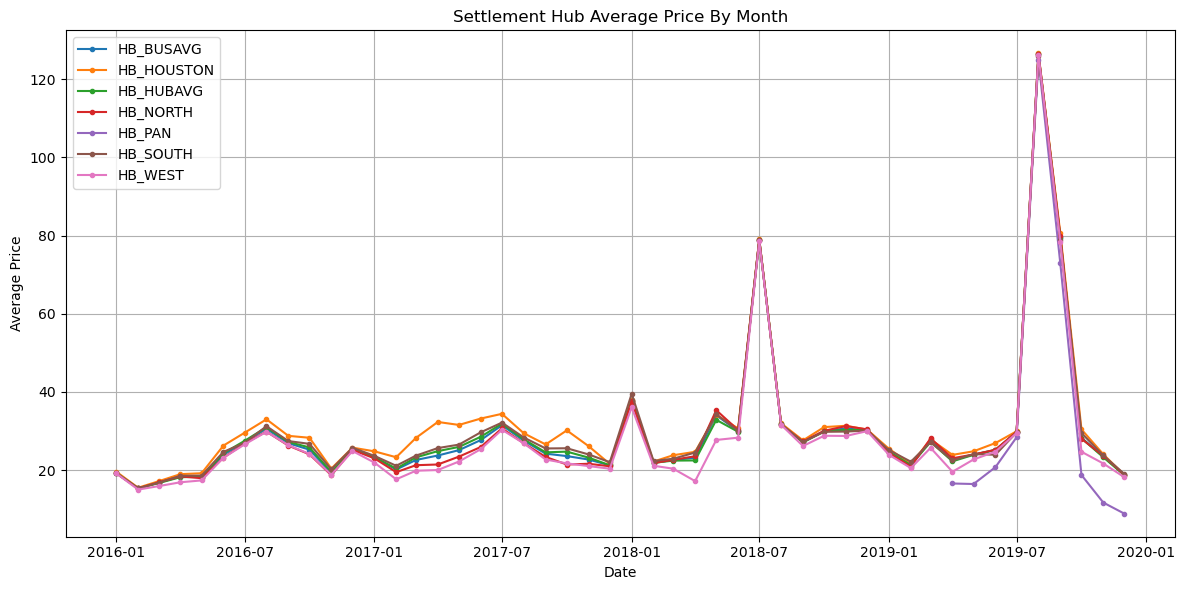

In [50]:
plt.figure(figsize=(12,6))
for s, spot_df in hubs_df.groupby("SettlementPoint"):
    spot_df = spot_df.sort_values("Date")
    plt.plot(spot_df["Date"], spot_df["AveragePrice"], label=s, marker='o', markersize=3)
plt.title("Settlement Hub Average Price By Month")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\fyasi\Downloads\cQuant-programming-exercise\Output\SettlementHubAveragePriceByMonth.png", dpi=200, bbox_inches="tight") #Specify path

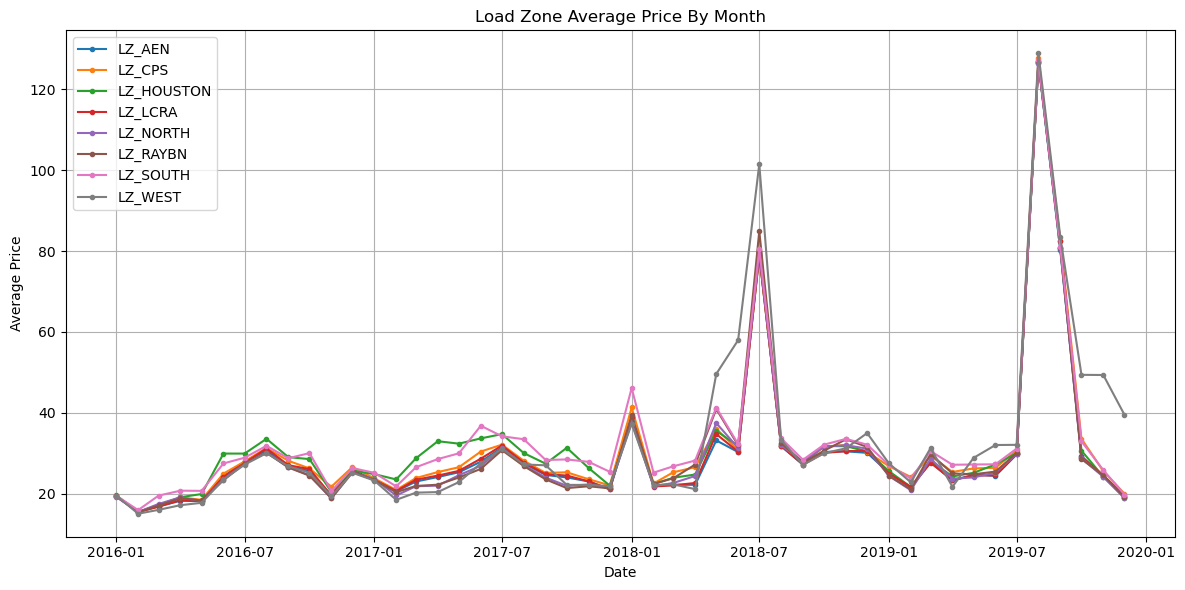

In [51]:
plt.figure(figsize=(12,6))
for s, spot_df in load_df.groupby("SettlementPoint"):
    spot_df = spot_df.sort_values("Date")
    plt.plot(spot_df["Date"], spot_df["AveragePrice"], label=s, marker='o', markersize=3)
plt.title("Load Zone Average Price By Month")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\fyasi\Downloads\cQuant-programming-exercise\Output\LoadZoneAveragePriceByMonth.png", dpi=200, bbox_inches="tight") #Specify Path

## Bonus–Volatility Plots 

In [53]:
vol_df

,SettlementPoint,Year,HourlyVolatility
0,HB_BUSAVG,2016,0.185773
1,HB_BUSAVG,2017,0.154092
2,HB_BUSAVG,2018,0.200254
3,HB_BUSAVG,2019,0.249378
4,HB_HOUSTON,2016,0.191099
5,HB_HOUSTON,2017,0.170477
6,HB_HOUSTON,2018,0.200244
7,HB_HOUSTON,2019,0.247946
8,HB_HUBAVG,2016,0.187957
9,HB_HUBAVG,2017,0.158687


In [54]:
pivot_vol = vol_df.pivot_table(index="Year", columns="SettlementPoint", values="HourlyVolatility")
pivot_vol

SettlementPoint,HB_BUSAVG,HB_HOUSTON,HB_HUBAVG,HB_NORTH,HB_PAN,HB_SOUTH,HB_WEST
Year,,,,,,,
2016,0.185773,0.191099,0.187957,0.184181,NaN,0.209026,0.208849
2017,0.154092,0.170477,0.158687,0.152575,NaN,0.156145,0.247628
2018,0.200254,0.200244,0.202121,0.200159,NaN,0.198684,0.302512
2019,0.249378,0.247946,0.250648,0.249618,0.631635,0.248980,0.336607


<Figure size 1200x600 with 0 Axes>

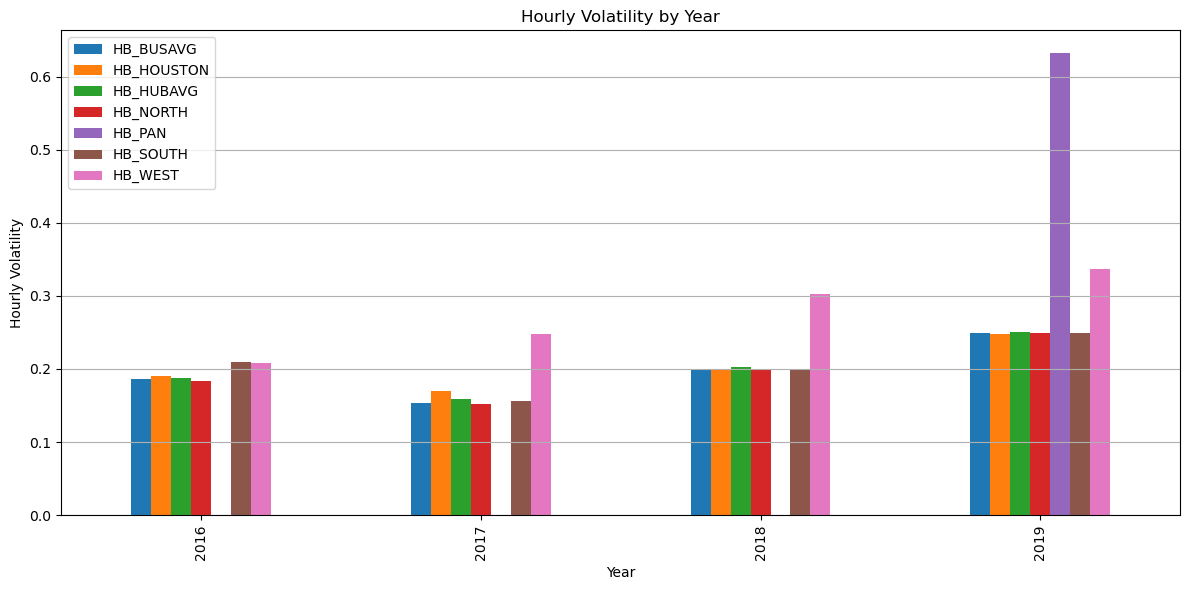

In [55]:
plt.figure(figsize=(12,6))
pivot_vol.plot(kind="bar", figsize=(12,6))
plt.title("Hourly Volatility by Year")
plt.xlabel("Year")
plt.ylabel("Hourly Volatility")
plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.savefig(r"C:\Users\fyasi\Downloads\cQuant-programming-exercise\Output\VolatilityPlot.png", dpi=200, bbox_inches="tight") #Specify path

## Bonus–Hourly Shape Profile Computation

In [57]:
df = combined_df.copy()
df

,Date,SettlementPoint,Price,Year
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,2016
1,2016-01-01 00:00:00,HB_HOUSTON,18.42,2016
2,2016-01-01 00:00:00,HB_HUBAVG,18.42,2016
3,2016-01-01 00:00:00,HB_NORTH,18.43,2016
4,2016-01-01 00:00:00,HB_SOUTH,18.38,2016
...,...,...,...,...
497315,2019-12-31 23:00:00,LZ_LCRA,14.53,2019
497316,2019-12-31 23:00:00,LZ_NORTH,14.48,2019
497317,2019-12-31 23:00:00,LZ_RAYBN,14.48,2019
497318,2019-12-31 23:00:00,LZ_SOUTH,14.70,2019


In [58]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["DayOfWeek"] = df["Date"].dt.dayofweek   
df["Hour"] = df["Date"].dt.hour  
df

,Date,SettlementPoint,Price,Year,Month,DayOfWeek,Hour
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,2016,1,4,0
1,2016-01-01 00:00:00,HB_HOUSTON,18.42,2016,1,4,0
2,2016-01-01 00:00:00,HB_HUBAVG,18.42,2016,1,4,0
3,2016-01-01 00:00:00,HB_NORTH,18.43,2016,1,4,0
4,2016-01-01 00:00:00,HB_SOUTH,18.38,2016,1,4,0
...,...,...,...,...,...,...,...
497315,2019-12-31 23:00:00,LZ_LCRA,14.53,2019,12,1,23
497316,2019-12-31 23:00:00,LZ_NORTH,14.48,2019,12,1,23
497317,2019-12-31 23:00:00,LZ_RAYBN,14.48,2019,12,1,23
497318,2019-12-31 23:00:00,LZ_SOUTH,14.70,2019,12,1,23


In [59]:
sp = df["SettlementPoint"].unique()
sp

array(['HB_BUSAVG', 'HB_HOUSTON', 'HB_HUBAVG', 'HB_NORTH', 'HB_SOUTH',
       'HB_WEST', 'LZ_AEN', 'LZ_CPS', 'LZ_HOUSTON', 'LZ_LCRA', 'LZ_NORTH',
       'LZ_RAYBN', 'LZ_SOUTH', 'LZ_WEST', 'HB_PAN'], dtype=object)

In [60]:
out_dir = r"C:\Users\fyasi\Downloads\cQuant-programming-exercise\Output\hourlyShapeProfiles" #Specify path
for i in sp:
    df_sp = df[df["SettlementPoint"] == i]
    grouped = (df_sp.groupby(["Month", "DayOfWeek", "Hour"])["Price"].mean().reset_index())
    pivot = grouped.pivot_table(index=["Month", "DayOfWeek"], columns="Hour", values="Price")
    pivot = pivot.reindex(columns=range(24))
    pivot = pivot.div(pivot.mean(axis=1), axis=0)
    pivot.columns = [f"X{h+1}" for h in pivot.columns]
    out_df = pivot.reset_index()
    out_df.insert(0, "SettlementPoint", i)
    outfile = os.path.join(out_dir, f"profile_{i}.csv")
    out_df.to_csv(outfile, index=False)

## Bonus–Open-Ended Analysis 

In [62]:
df = combined_df.copy()
df

,Date,SettlementPoint,Price,Year
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,2016
1,2016-01-01 00:00:00,HB_HOUSTON,18.42,2016
2,2016-01-01 00:00:00,HB_HUBAVG,18.42,2016
3,2016-01-01 00:00:00,HB_NORTH,18.43,2016
4,2016-01-01 00:00:00,HB_SOUTH,18.38,2016
...,...,...,...,...
497315,2019-12-31 23:00:00,LZ_LCRA,14.53,2019
497316,2019-12-31 23:00:00,LZ_NORTH,14.48,2019
497317,2019-12-31 23:00:00,LZ_RAYBN,14.48,2019
497318,2019-12-31 23:00:00,LZ_SOUTH,14.70,2019


### Hubs Price Distribution

In [64]:
hubs_df =df[df["SettlementPoint"].str.startswith("HB_")].copy()
hubs_df

,Date,SettlementPoint,Price,Year
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,2016
1,2016-01-01 00:00:00,HB_HOUSTON,18.42,2016
2,2016-01-01 00:00:00,HB_HUBAVG,18.42,2016
3,2016-01-01 00:00:00,HB_NORTH,18.43,2016
4,2016-01-01 00:00:00,HB_SOUTH,18.38,2016
...,...,...,...,...
497307,2019-12-31 23:00:00,HB_HUBAVG,14.45,2019
497308,2019-12-31 23:00:00,HB_NORTH,14.46,2019
497309,2019-12-31 23:00:00,HB_PAN,14.12,2019
497310,2019-12-31 23:00:00,HB_SOUTH,14.50,2019


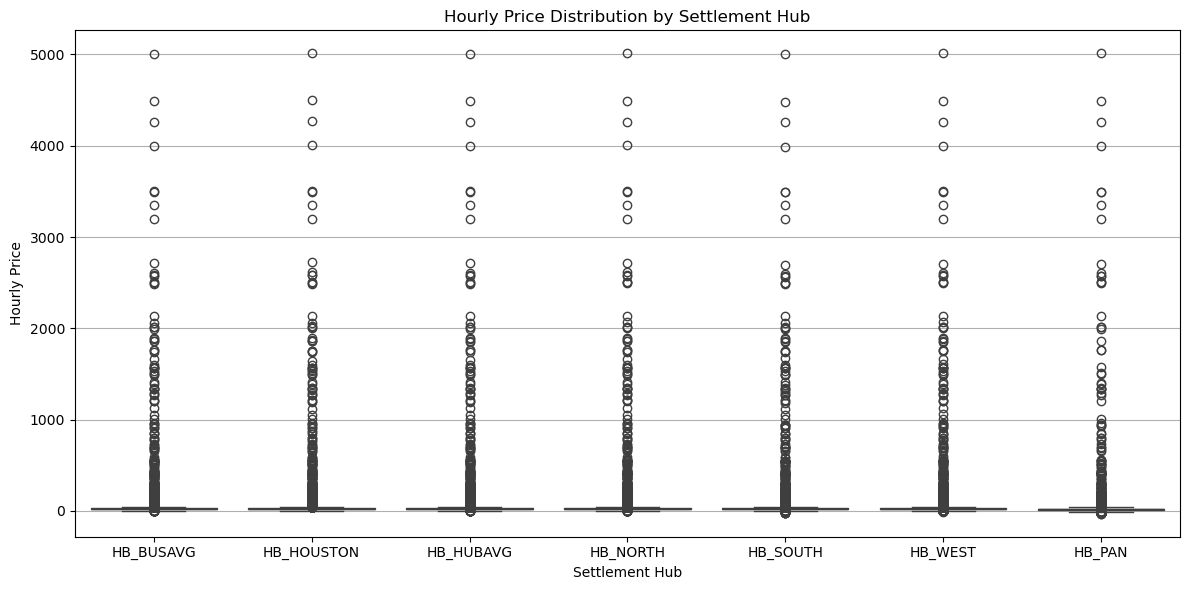

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(data=hubs_df, x="SettlementPoint", y="Price")
plt.title("Hourly Price Distribution by Settlement Hub")
plt.xlabel("Settlement Hub")
plt.ylabel("Hourly Price")
plt.grid(axis="y")
plt.tight_layout()
plt.savefig(r"C:\Users\fyasi\Downloads\cQuant-programming-exercise\Output\HubPriceDistribution.png", dpi=200, bbox_inches="tight") #Specify path

### Price Spike Analysis

In [67]:
th = 1000 #price higher than 1000 is considered spike
hubs_df["Spike"] = (hubs_df["Price"] >= th).astype(int)
hubs_df

,Date,SettlementPoint,Price,Year,Spike
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,2016,0
1,2016-01-01 00:00:00,HB_HOUSTON,18.42,2016,0
2,2016-01-01 00:00:00,HB_HUBAVG,18.42,2016,0
3,2016-01-01 00:00:00,HB_NORTH,18.43,2016,0
4,2016-01-01 00:00:00,HB_SOUTH,18.38,2016,0
...,...,...,...,...,...
497307,2019-12-31 23:00:00,HB_HUBAVG,14.45,2019,0
497308,2019-12-31 23:00:00,HB_NORTH,14.46,2019,0
497309,2019-12-31 23:00:00,HB_PAN,14.12,2019,0
497310,2019-12-31 23:00:00,HB_SOUTH,14.50,2019,0


In [68]:
spike = hubs_df.groupby("SettlementPoint")["Spike"].sum().reset_index()
spike

,SettlementPoint,Spike
0,HB_BUSAVG,52
1,HB_HOUSTON,52
2,HB_HUBAVG,52
3,HB_NORTH,52
4,HB_PAN,35
5,HB_SOUTH,52
6,HB_WEST,52


In [69]:
hubs_df["YearMonth"] = hubs_df["Date"].dt.to_period("M")
spikerate = (hubs_df.groupby("YearMonth")["Spike"].mean().reset_index(name="SpikeRate"))
spikerate["YearMonth"] = pd.to_datetime(spikerate["YearMonth"].astype(str))

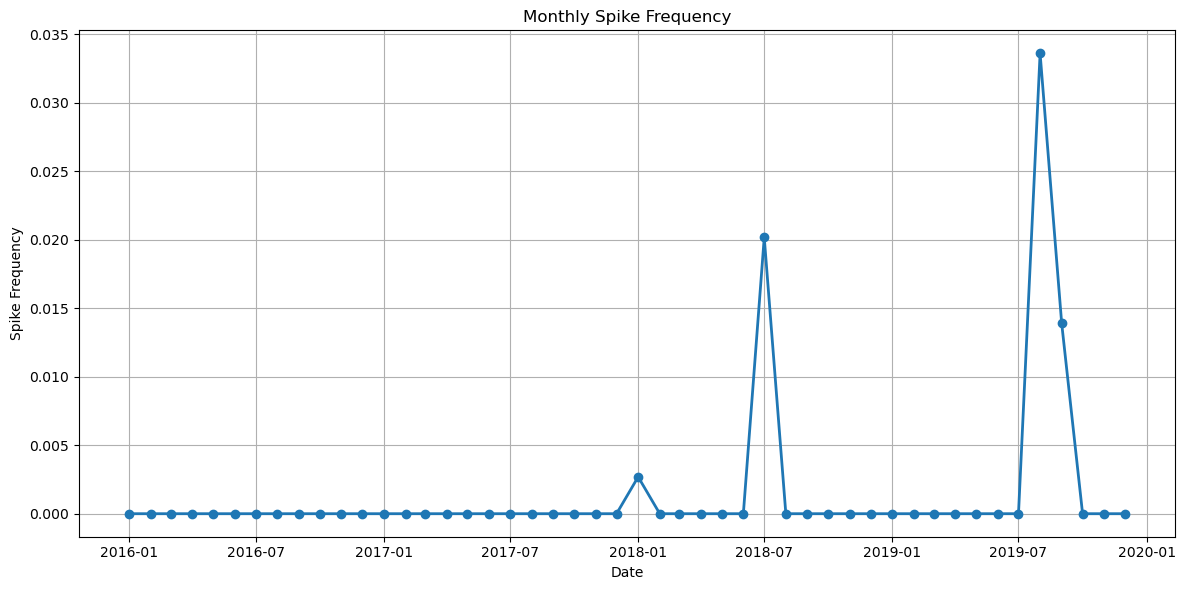

In [70]:
plt.figure(figsize=(12,6))
plt.plot(spikerate["YearMonth"], spikerate["SpikeRate"], marker="o", linewidth=2)
plt.title("Monthly Spike Frequency")
plt.xlabel("Date")
plt.ylabel("Spike Frequency")
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\fyasi\Downloads\cQuant-programming-exercise\Output\PriceSpikeFrequency.png", dpi=200, bbox_inches="tight") #Specify path

### Price spike prediction with logistic regression

In [72]:
hubs_df

,Date,SettlementPoint,Price,Year,Spike,YearMonth
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,2016,0,2016-01
1,2016-01-01 00:00:00,HB_HOUSTON,18.42,2016,0,2016-01
2,2016-01-01 00:00:00,HB_HUBAVG,18.42,2016,0,2016-01
3,2016-01-01 00:00:00,HB_NORTH,18.43,2016,0,2016-01
4,2016-01-01 00:00:00,HB_SOUTH,18.38,2016,0,2016-01
...,...,...,...,...,...,...
497307,2019-12-31 23:00:00,HB_HUBAVG,14.45,2019,0,2019-12
497308,2019-12-31 23:00:00,HB_NORTH,14.46,2019,0,2019-12
497309,2019-12-31 23:00:00,HB_PAN,14.12,2019,0,2019-12
497310,2019-12-31 23:00:00,HB_SOUTH,14.50,2019,0,2019-12


In [73]:
hubs_df["Hour"] = hubs_df["Date"].dt.hour
hubs_df["Month"] = hubs_df["Date"].dt.month
hubs_df

,Date,SettlementPoint,Price,Year,Spike,YearMonth,Hour,Month
0,2016-01-01 00:00:00,HB_BUSAVG,18.42,2016,0,2016-01,0,1
1,2016-01-01 00:00:00,HB_HOUSTON,18.42,2016,0,2016-01,0,1
2,2016-01-01 00:00:00,HB_HUBAVG,18.42,2016,0,2016-01,0,1
3,2016-01-01 00:00:00,HB_NORTH,18.43,2016,0,2016-01,0,1
4,2016-01-01 00:00:00,HB_SOUTH,18.38,2016,0,2016-01,0,1
...,...,...,...,...,...,...,...,...
497307,2019-12-31 23:00:00,HB_HUBAVG,14.45,2019,0,2019-12,23,12
497308,2019-12-31 23:00:00,HB_NORTH,14.46,2019,0,2019-12,23,12
497309,2019-12-31 23:00:00,HB_PAN,14.12,2019,0,2019-12,23,12
497310,2019-12-31 23:00:00,HB_SOUTH,14.50,2019,0,2019-12,23,12


In [74]:
X = hubs_df[["Hour", "Month"]].copy()
X = pd.concat([X, pd.get_dummies(hubs_df["SettlementPoint"])], axis=1)
y = hubs_df["Spike"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_prob)
auc

0.7084873301575105

Model performance is not great, but it has somewhat good capability to predict if there'll be a spike.